# Beautiful Soup Notebook

Many data analysis, big data, and machine learning projects require scraping websites to gather the data that you’ll be working with. The Python programming language is widely used in the data science community, and therefore has an ecosystem of modules and tools that you can use in your own projects.


Beautiful Soup, is a Python library that allows for quick turnaround on web scraping projects. Currently available as Beautiful Soup 4 and compatible with both Python 2.7 and Python 3, Beautiful Soup creates a parse tree from parsed HTML and XML documents (including documents with non-closed tags or tag soup and other malformed markup).

### Data

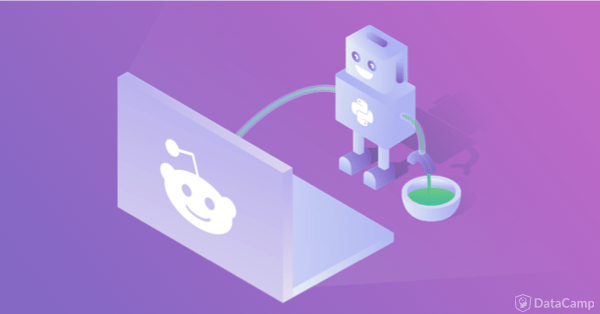
Image Source: https://www.datacamp.com/community/tutorials/scraping-reddit-python-scrapy

### Pre-Requisite Installation

1. Python and Jupyter Notebook installed and running
2. Python Packages requests and beautifulsoup installed
- `pip install package_name`

### Basic Terminology:
- XPATH - XPath uses path expressions to select nodes or node-sets in an XML document. This can vary for different browsers. Reference: https://www.w3schools.com/xml/xpath_intro.asp
- CSS Selectors - In CSS, selectors are patterns used to select the element(s) you want to style. This remains the same for webpage. Reference: https://www.w3schools.com/cssref/css_selectors.asp

### A few pointers:
- Try exploring a webpage manually first, look for patterns and try to make your code as generic as possible.
- The same webpage may behave different in different browsers.

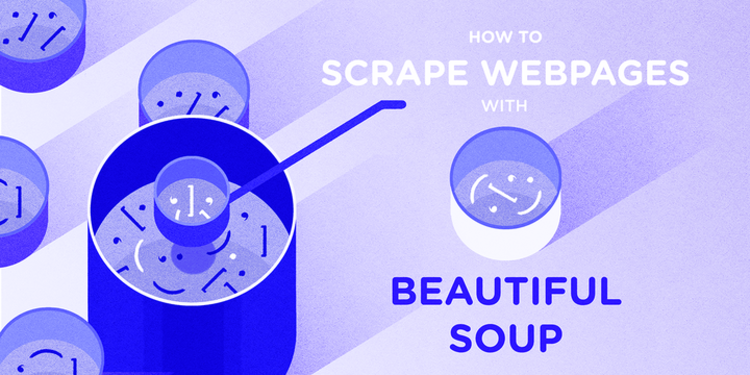
Image Source: https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3

### Ready Set Scrape
Lets begin by scraping the data from the IMDb Top Rated Movies Webpage at the following URL:

https://www.imdb.com/chart/top?ref_=nv_mv_250

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
website_link='https://www.imdb.com'
page = requests.get(website_link+'/chart/top?ref_=nv_mv_250')


print(type(page))

page.text

<class 'requests.models.Response'>


u'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    \n    \n    \n\n    \n    \n    \n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n            <style>\n                body#styleguide-v2 {\n                    background: no-repeat fixed center top #000;\n                }\n            </style>\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>IMDb Top 250 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_tit

### What's with all this  ```<something> something <something>``` Text

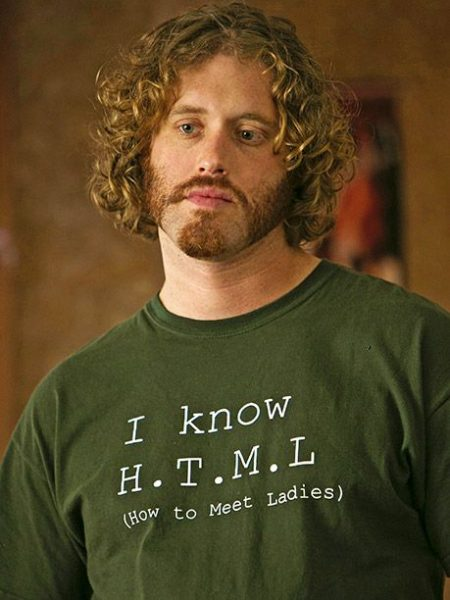
Source: Silicon valley

### HTML is just this really:

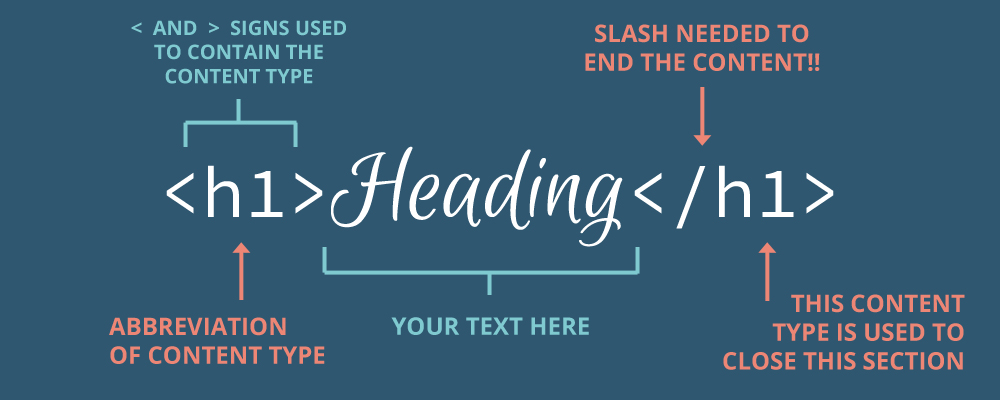

Source (and good html reference): http://www.thesepapersites.com/2016/09/13/html-tags-explained-simply/


In [3]:
# Create a BeautifulSoup object to read between the tags
soup = BeautifulSoup(page.text, 'html.parser')
soup

\n<!DOCTYPE html>\n\n<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">\n<head>\n<meta charset="unicode-escape"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>\n<style>\n                body#styleguide-v2 {\n                    background: no-repeat fixed center top #000;\n                }\n            </style>\n<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>\n<script>\n    if (typeof uet == 'function') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<title>IMDb Top 250 - IMDb</title>\n<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == 'function') {\n      uet("be", "LoadT

## Pulling Text From a Web Page

In [4]:
# Pull all text from the required div class


movies_list=soup.find(class_="lister")
movies_list

<div class="lister">\n<div>\n<div class="nav">\n<div class="controls float-right lister-activated">\n<label class="lister-sort-by-label" for="lister-sort-by-options">Sort by: </label>\n<select class="lister-sort-by" id="lister-sort-by-options" name="sort">\n<option selected="selected" value="rk:ascending">\n          Ranking\n        </option>\n<option value="ir:descending">\n          IMDb Rating\n        </option>\n<option value="us:descending">\n          Release Date\n        </option>\n<option value="nv:descending">\n          Number of Ratings\n        </option>\n<option value="ur:descending">\n          Your Rating\n        </option>\n</select>\n<span class="global-sprite lister-sort-reverse descending" data-sort="rk:desc">\n</span>\n</div>\n<div class="desc">Showing <span>250</span> Titles</div>\n</div>\n</div>\n<br class="clear"/>\n<table class="chart full-width" data-caller-name="chart-top250movie">\n<colgroup>\n<col class="chartTableColumnPoster"/>\n<col class="chartTableCol

In [5]:
# Pull all text from the BodyText div


top_movies_table=movies_list.find(class_="lister-list")
top_movies_table

<tbody class="lister-list">\n<tr>\n<td class="posterColumn">\n<span data-value="1" name="rk"></span>\n<span data-value="9.217542507823124" name="ir"></span>\n<span data-value="7.791552E11" name="us"></span>\n<span data-value="2092870" name="nv"></span>\n<span data-value="-1.782457492176876" name="ur"></span>\n<a href="/title/tt0111161/"> <img alt="The Shawshank Redemption" height="67" src="https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_UY67_CR0,0,45,67_AL_.jpg" width="45"/>\n</a> </td>\n<td class="titleColumn">\n      1.\n      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>\n<span class="secondaryInfo">(1994)</span>\n</td>\n<td class="ratingColumn imdbRating">\n<strong title="9.2 based on 2,092,870 user ratings">9.2</strong>\n</td>\n<td class="ratingColumn">\n<div class="seen-widget seen-widget-tt0111161 pending" data-titleid="tt0111161">\n<div 

In [6]:
# Pull text from all instances of <a> tag within BodyText div


top_movies_titles=top_movies_table.find_all(class_="titleColumn")
top_movies_titles

[<td class="titleColumn">\n      1.\n      <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>\n<span class="secondaryInfo">(1994)</span>\n</td>,
 <td class="titleColumn">\n      2.\n      <a href="/title/tt0068646/" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>\n<span class="secondaryInfo">(1972)</span>\n</td>,
 <td class="titleColumn">\n      3.\n      <a href="/title/tt0071562/" title="Francis Ford Coppola (dir.), Al Pacino, Robert De Niro">The Godfather: Part II</a>\n<span class="secondaryInfo">(1974)</span>\n</td>,
 <td class="titleColumn">\n      4.\n      <a href="/title/tt0468569/" title="Christopher Nolan (dir.), Christian Bale, Heath Ledger">The Dark Knight</a>\n<span class="secondaryInfo">(2008)</span>\n</td>,
 <td class="titleColumn">\n      5.\n      <a href="/title/tt0050083/" title="Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb">12 Angry Men</a>\n<span class="secondaryInfo">

Removing Superfluous Data

In [7]:
for row in top_movies_titles:
    print(row.prettify())

<td class="titleColumn">
 1.
 <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">
  The Shawshank Redemption
 </a>
 <span class="secondaryInfo">
  (1994)
 </span>
</td>

<td class="titleColumn">
 2.
 <a href="/title/tt0068646/" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">
  The Godfather
 </a>
 <span class="secondaryInfo">
  (1972)
 </span>
</td>

<td class="titleColumn">
 3.
 <a href="/title/tt0071562/" title="Francis Ford Coppola (dir.), Al Pacino, Robert De Niro">
  The Godfather: Part II
 </a>
 <span class="secondaryInfo">
  (1974)
 </span>
</td>

<td class="titleColumn">
 4.
 <a href="/title/tt0468569/" title="Christopher Nolan (dir.), Christian Bale, Heath Ledger">
  The Dark Knight
 </a>
 <span class="secondaryInfo">
  (2008)
 </span>
</td>

<td class="titleColumn">
 5.
 <a href="/title/tt0050083/" title="Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb">
  12 Angry Men
 </a>
 <span class="secondaryInfo">
  (1957)
 </span>
</td>

In [8]:
for row in top_movies_titles:
    print(row.contents)

[u'\n      1.\n      ', <a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">The Shawshank Redemption</a>, u'\n', <span class="secondaryInfo">(1994)</span>, u'\n']
[u'\n      2.\n      ', <a href="/title/tt0068646/" title="Francis Ford Coppola (dir.), Marlon Brando, Al Pacino">The Godfather</a>, u'\n', <span class="secondaryInfo">(1972)</span>, u'\n']
[u'\n      3.\n      ', <a href="/title/tt0071562/" title="Francis Ford Coppola (dir.), Al Pacino, Robert De Niro">The Godfather: Part II</a>, u'\n', <span class="secondaryInfo">(1974)</span>, u'\n']
[u'\n      4.\n      ', <a href="/title/tt0468569/" title="Christopher Nolan (dir.), Christian Bale, Heath Ledger">The Dark Knight</a>, u'\n', <span class="secondaryInfo">(2008)</span>, u'\n']
[u'\n      5.\n      ', <a href="/title/tt0050083/" title="Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb">12 Angry Men</a>, u'\n', <span class="secondaryInfo">(1957)</span>, u'\n']
[u'\n      6.\n      ', <a href="/titl

[u'\n      211.\n      ', <a href="/title/tt0060107/" title="Andrei Tarkovsky (dir.), Anatoliy Solonitsyn, Ivan Lapikov">Andrei Rublev</a>, u'\n', <span class="secondaryInfo">(1966)</span>, u'\n']
[u'\n      212.\n      ', <a href="/title/tt0264464/" title="Steven Spielberg (dir.), Leonardo DiCaprio, Tom Hanks">Catch Me If You Can</a>, u'\n', <span class="secondaryInfo">(2002)</span>, u'\n']
[u'\n      213.\n      ', <a href="/title/tt1895587/" title="Tom McCarthy (dir.), Mark Ruffalo, Michael Keaton">Spotlight</a>, u'\n', <span class="secondaryInfo">(2015)</span>, u'\n']
[u'\n      214.\n      ', <a href="/title/tt0245712/" title="Alejandro G. I\xf1\xe1rritu (dir.), Emilio Echevarr\xeda, Gael Garc\xeda Bernal">Amores perros</a>, u'\n', <span class="secondaryInfo">(2000)</span>, u'\n']
[u'\n      215.\n      ', <a href="/title/tt0019254/" title="Carl Theodor Dreyer (dir.), Maria Falconetti, Eugene Silvain">La passion de Jeanne d'Arc</a>, u'\n', <span class="secondaryInfo">(1928)</span>

Print the extracted Text

In [9]:
for row in top_movies_titles:
    print(row.text.replace('\n',''))

      1.      The Shawshank Redemption(1994)
      2.      The Godfather(1972)
      3.      The Godfather: Part II(1974)
      4.      The Dark Knight(2008)
      5.      12 Angry Men(1957)
      6.      Schindler's List(1993)
      7.      The Lord of the Rings: The Return of the King(2003)
      8.      Pulp Fiction(1994)
      9.      The Good, the Bad and the Ugly(1966)
      10.      Fight Club(1999)
      11.      The Lord of the Rings: The Fellowship of the Ring(2001)
      12.      Forrest Gump(1994)
      13.      Inception(2010)
      14.      Star Wars: Episode V - The Empire Strikes Back(1980)
      15.      The Lord of the Rings: The Two Towers(2002)
      16.      Avengers: Endgame(2019)
      17.      One Flew Over the Cuckoo's Nest(1975)
      18.      Goodfellas(1990)
      19.      The Matrix(1999)
      20.      Seven Samurai(1954)
      21.      Se7en(1995)
      22.      Cidade de Deus(2002)
      23.      Star Wars(1977)
      24.      The Silence of the Lambs(19

Pulling the Links from a Tag

In [10]:
for row in top_movies_titles:
    print(row.find('a').get('href'))

/title/tt0111161/
/title/tt0068646/
/title/tt0071562/
/title/tt0468569/
/title/tt0050083/
/title/tt0108052/
/title/tt0167260/
/title/tt0110912/
/title/tt0060196/
/title/tt0137523/
/title/tt0120737/
/title/tt0109830/
/title/tt1375666/
/title/tt0080684/
/title/tt0167261/
/title/tt4154796/
/title/tt0073486/
/title/tt0099685/
/title/tt0133093/
/title/tt0047478/
/title/tt0114369/
/title/tt0317248/
/title/tt0076759/
/title/tt0102926/
/title/tt0038650/
/title/tt0118799/
/title/tt0245429/
/title/tt0120815/
/title/tt0114814/
/title/tt0110413/
/title/tt0120689/
/title/tt0816692/
/title/tt0054215/
/title/tt0120586/
/title/tt0021749/
/title/tt0034583/
/title/tt0064116/
/title/tt0253474/
/title/tt0027977/
/title/tt1675434/
/title/tt0407887/
/title/tt0088763/
/title/tt0103064/
/title/tt2582802/
/title/tt0110357/
/title/tt0047396/
/title/tt0172495/
/title/tt0082971/
/title/tt0482571/
/title/tt0078788/
/title/tt0209144/
/title/tt0078748/
/title/tt0095327/
/title/tt0095765/
/title/tt4633694/
/title/tt0

Merging the tiltes and links and printing the data together

In [12]:
movie_list_df = pd.DataFrame(columns=['Movie_title','IMDb_link'])

In [13]:
movie_list_df

,Movie_title,IMDb_link


In [17]:

for row in top_movies_titles:
    titles=row.text.replace('\n','')
    links=website_link + row.find('a').get('href')
    movie_list_df=movie_list_df.append({'Movie_title':titles,'IMDb_link':links},ignore_index=True)
    print(titles)
    print(links)

      1.      The Shawshank Redemption(1994)
https://www.imdb.com/title/tt0111161/
      2.      The Godfather(1972)
https://www.imdb.com/title/tt0068646/
      3.      The Godfather: Part II(1974)
https://www.imdb.com/title/tt0071562/
      4.      The Dark Knight(2008)
https://www.imdb.com/title/tt0468569/
      5.      12 Angry Men(1957)
https://www.imdb.com/title/tt0050083/
      6.      Schindler's List(1993)
https://www.imdb.com/title/tt0108052/
      7.      The Lord of the Rings: The Return of the King(2003)
https://www.imdb.com/title/tt0167260/
      8.      Pulp Fiction(1994)
https://www.imdb.com/title/tt0110912/
      9.      The Good, the Bad and the Ugly(1966)
https://www.imdb.com/title/tt0060196/
      10.      Fight Club(1999)
https://www.imdb.com/title/tt0137523/
      11.      The Lord of the Rings: The Fellowship of the Ring(2001)
https://www.imdb.com/title/tt0120737/
      12.      Forrest Gump(1994)
https://www.imdb.com/title/tt0109830/
      13.      Inception(2010

      110.      Monty Python and the Holy Grail(1975)
https://www.imdb.com/title/tt0071853/
      111.      L.A. Confidential(1997)
https://www.imdb.com/title/tt0119488/
      112.      Jodaeiye Nader az Simin(2011)
https://www.imdb.com/title/tt1832382/
      113.      Indiana Jones and the Last Crusade(1989)
https://www.imdb.com/title/tt0097576/
      114.      Up(2009)
https://www.imdb.com/title/tt1049413/
      115.      Rashomon(1950)
https://www.imdb.com/title/tt0042876/
      116.      All About Eve(1950)
https://www.imdb.com/title/tt0042192/
      117.      Batman Begins(2005)
https://www.imdb.com/title/tt0372784/
      118.      Some Like It Hot(1959)
https://www.imdb.com/title/tt0053291/
      119.      Yojimbo(1961)
https://www.imdb.com/title/tt0055630/
      120.      Downfall(2004)
https://www.imdb.com/title/tt0363163/
      121.      Unforgiven(1992)
https://www.imdb.com/title/tt0105695/
      122.      Die Hard(1988)
https://www.imdb.com/title/tt0095016/
      123.      H

      225.      The Grapes of Wrath(1940)
https://www.imdb.com/title/tt0032551/
      226.      The Maltese Falcon(1941)
https://www.imdb.com/title/tt0033870/
      227.      The Terminator(1984)
https://www.imdb.com/title/tt0088247/
      228.      Ah-ga-ssi(2016)
https://www.imdb.com/title/tt4016934/
      229.      Gandhi(1982)
https://www.imdb.com/title/tt0083987/
      230.      La haine(1995)
https://www.imdb.com/title/tt0113247/
      231.      Faa yeung nin wa(2000)
https://www.imdb.com/title/tt0118694/
      232.      Donnie Darko(2001)
https://www.imdb.com/title/tt0246578/
      233.      Da hong deng long gao gao gua(1991)
https://www.imdb.com/title/tt0101640/
      234.      Les diaboliques(1955)
https://www.imdb.com/title/tt0046911/
      235.      Groundhog Day(1993)
https://www.imdb.com/title/tt0107048/
      236.      The Help(2011)
https://www.imdb.com/title/tt1454029/
      237.      The Wizard of Oz(1939)
https://www.imdb.com/title/tt0032138/
      238.      Jaws(197

In [18]:
movie_list_df

,Movie_title,IMDb_link
0,1. The Shawshank Redemption(1994),https://www.imdb.com/title/tt0111161/
1,2. The Godfather(1972),https://www.imdb.com/title/tt0068646/
2,3. The Godfather: Part II(1974),https://www.imdb.com/title/tt0071562/
3,4. The Dark Knight(2008),https://www.imdb.com/title/tt0468569/
4,5. 12 Angry Men(1957),https://www.imdb.com/title/tt0050083/
5,6. Schindler's List(1993),https://www.imdb.com/title/tt0108052/
6,7. The Lord of the Rings: The Retur...,https://www.imdb.com/title/tt0167260/
7,8. Pulp Fiction(1994),https://www.imdb.com/title/tt0110912/
8,"9. The Good, the Bad and the Ugly(1...",https://www.imdb.com/title/tt0060196/
9,10. Fight Club(1999),https://www.imdb.com/title/tt0137523/
